In [1]:
# 倒入模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['KaiTi']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图片‘-’显示为方块问题

加载数据

In [3]:
data = pd.read_csv('airport-ontime.csv')
data.shape

(502617, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502617 entries, 0 to 502616
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   FL_DATE                502617 non-null  object 
 1   UNIQUE_CARRIER         502617 non-null  object 
 2   ORIGIN_AIRPORT_ID      502617 non-null  int64  
 3   ORIGIN_AIRPORT_SEQ_ID  502617 non-null  int64  
 4   ORIGIN_CITY_MARKET_ID  502617 non-null  int64  
 5   ORIGIN_STATE_ABR       502617 non-null  object 
 6   DEST_AIRPORT_ID        502617 non-null  int64  
 7   DEST_AIRPORT_SEQ_ID    502617 non-null  int64  
 8   DEST_CITY_MARKET_ID    502617 non-null  int64  
 9   DEST_STATE_ABR         502617 non-null  object 
 10  DEP_DELAY_NEW          492974 non-null  float64
 11  DEP_DEL15              492974 non-null  float64
 12  ARR_DELAY_NEW          490716 non-null  float64
 13  ARR_DEL15              490716 non-null  float64
 14  DISTANCE               502617 non-nu

In [4]:
# 处理缺值  删除unnamed列
# data.isnull().sum()
data.dropna(axis=1, how='all', inplace=True)

In [10]:
# data.info()
data.isnull().sum()

FL_DATE                      0
UNIQUE_CARRIER               0
ORIGIN_AIRPORT_ID            0
ORIGIN_AIRPORT_SEQ_ID        0
ORIGIN_CITY_MARKET_ID        0
ORIGIN_STATE_ABR             0
DEST_AIRPORT_ID              0
DEST_AIRPORT_SEQ_ID          0
DEST_CITY_MARKET_ID          0
DEST_STATE_ABR               0
DEP_DELAY_NEW             9643
DEP_DEL15                 9643
ARR_DELAY_NEW            11901
ARR_DEL15                11901
DISTANCE                     0
DISTANCE_GROUP               0
dtype: int64

In [12]:
# 查看是否有重复值
data.duplicated().any()  # 返回True说明有重复值

True

In [13]:
# 删除重复值
data.drop_duplicates(inplace=True)

In [14]:
# 再次查看是否有重复值
data.duplicated().any()

False

起飞到达是否延迟

In [15]:
# 起飞是否延迟
data['DEP_DEL15']

0         0.0
1         0.0
3         1.0
4         0.0
5         0.0
         ... 
502612    1.0
502613    0.0
502614    0.0
502615    0.0
502616    0.0
Name: DEP_DEL15, Length: 394113, dtype: float64

In [16]:
# 是否延迟数量
result = data['DEP_DEL15'].dropna()

In [17]:
result.value_counts()

0.0    260977
1.0    125081
Name: DEP_DEL15, dtype: int64

<AxesSubplot:>

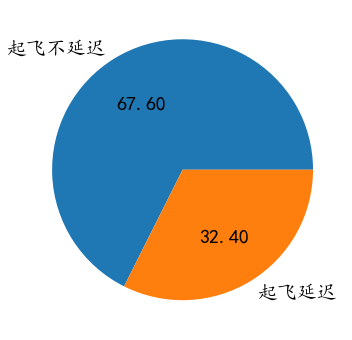

In [21]:
# 绘制饼图显示
dep_count = result.value_counts()
dep_count.name=''
dep_count.plot(kind='pie', labels=['起飞不延迟', '起飞延迟'],autopct='%.2f', fontsize=20, figsize=(8, 6))

In [23]:
# 到达延迟和不延迟
arr_count = data['ARR_DEL15'].dropna().value_counts()

<AxesSubplot:ylabel='ARR_DEL15'>

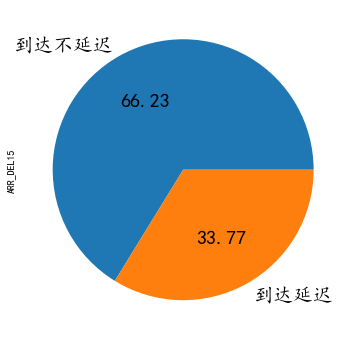

In [24]:
arr_count.plot(kind='pie', labels=['到达不延迟', '到达延迟'],autopct='%.2f', fontsize=20, figsize=(8, 6))

机场起飞延迟分析

In [27]:
data.info()
# 缺值处理
orgin_data = data[['ORIGIN_STATE_ABR', 'DEP_DEL15']].dropna()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394113 entries, 0 to 502616
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   FL_DATE                394113 non-null  object 
 1   UNIQUE_CARRIER         394113 non-null  object 
 2   ORIGIN_AIRPORT_ID      394113 non-null  int64  
 3   ORIGIN_AIRPORT_SEQ_ID  394113 non-null  int64  
 4   ORIGIN_CITY_MARKET_ID  394113 non-null  int64  
 5   ORIGIN_STATE_ABR       394113 non-null  object 
 6   DEST_AIRPORT_ID        394113 non-null  int64  
 7   DEST_AIRPORT_SEQ_ID    394113 non-null  int64  
 8   DEST_CITY_MARKET_ID    394113 non-null  int64  
 9   DEST_STATE_ABR         394113 non-null  object 
 10  DEP_DELAY_NEW          386058 non-null  float64
 11  DEP_DEL15              386058 non-null  float64
 12  ARR_DELAY_NEW          383812 non-null  float64
 13  ARR_DEL15              383812 non-null  float64
 14  DISTANCE               394113 non-nu

In [29]:
# 按照ORIGIN_STATE_ABR分组，统计延迟数
origin_delay_count = orgin_data.groupby('ORIGIN_STATE_ABR')['DEP_DEL15'].sum()

<AxesSubplot:xlabel='ORIGIN_STATE_ABR'>

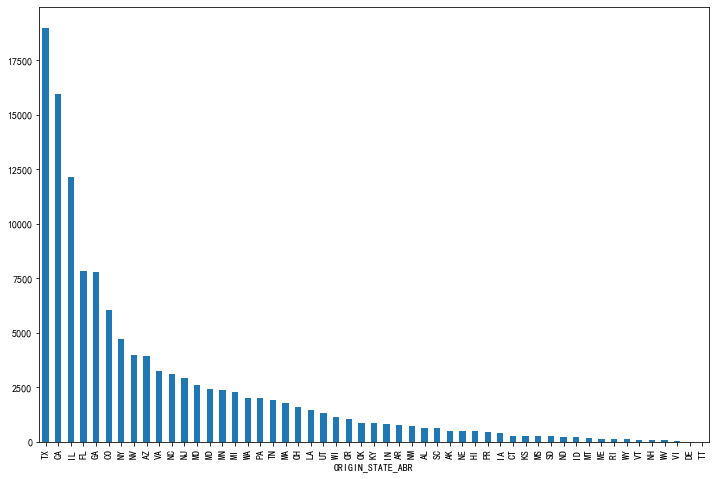

In [30]:
# 绘制条形图
origin_delay_count.sort_values(ascending=False).plot(kind='bar',figsize=(12, 8))

In [32]:
# 绘制到达机场延迟数
dest_data = data[['DEST_STATE_ABR', 'ARR_DEL15']].dropna()

In [34]:
arr_delay_count = dest_data.groupby('DEST_STATE_ABR')['ARR_DEL15'].sum()
arr_delay_count

DEST_STATE_ABR
AK      717.0
AL      803.0
AR      866.0
AZ     3571.0
CA    17677.0
CO     5357.0
CT      526.0
DE       30.0
FL     7533.0
GA     6560.0
HI      734.0
IA      595.0
ID      328.0
IL    11520.0
IN      981.0
KS      383.0
KY     1049.0
LA     1602.0
MA     2300.0
MD     1923.0
ME      192.0
MI     2300.0
MN     2433.0
MO     2721.0
MS      317.0
MT      270.0
NC     2957.0
ND      389.0
NE      670.0
NH      189.0
NJ     3076.0
NM      845.0
NV     3561.0
NY     6266.0
OH     2035.0
OK     1100.0
OR     1406.0
PA     2403.0
PR      568.0
RI      301.0
SC      731.0
SD      360.0
TN     2084.0
TT       13.0
TX    17832.0
UT     1411.0
VA     3661.0
VI       73.0
VT      153.0
WA     2407.0
WI     1546.0
WV       99.0
WY      188.0
Name: ARR_DEL15, dtype: float64

<AxesSubplot:xlabel='DEST_STATE_ABR'>

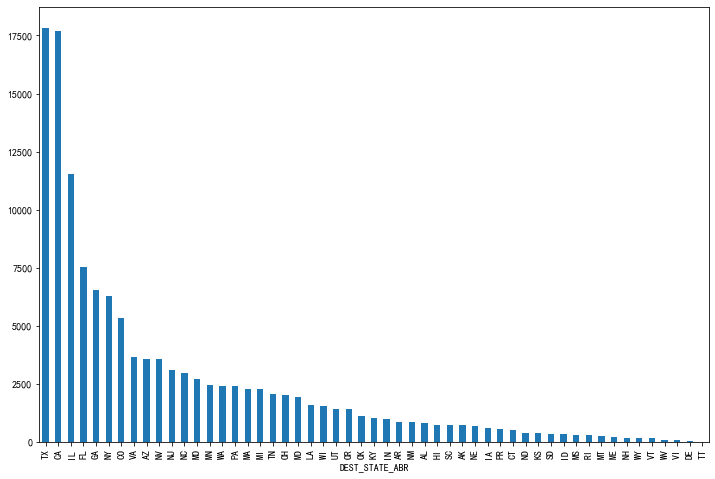

In [35]:
# 绘制条形图
arr_delay_count.sort_values(ascending=False).plot(kind='bar', figsize=(12, 8))

In [37]:
# 将机场起飞延迟和到达延迟和并
df = pd.DataFrame([origin_delay_count, arr_delay_count]).T
df

,DEP_DEL15,ARR_DEL15
AK,524.0,717.0
AL,641.0,803.0
AR,789.0,866.0
AZ,3937.0,3571.0
CA,15955.0,17677.0
CO,6041.0,5357.0
CT,293.0,526.0
DE,19.0,30.0
FL,7861.0,7533.0
GA,7795.0,6560.0


<AxesSubplot:title={'center':'起飞到达延迟状况'}>

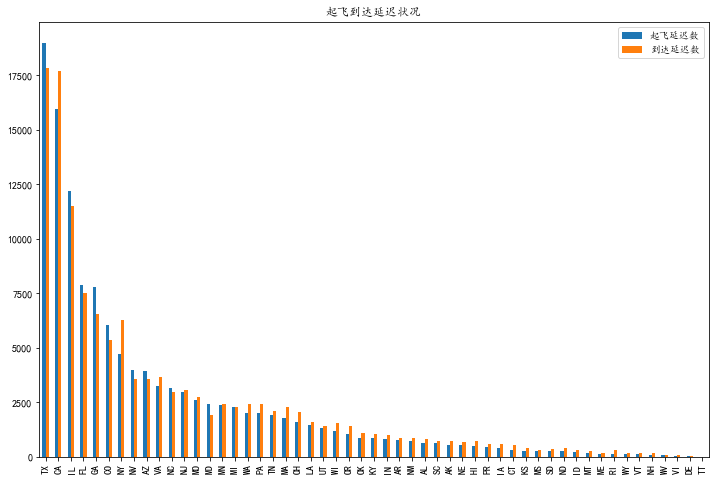

In [39]:
# 修改列名称
df.columns = ['起飞延迟数', '到达延迟数']
df.sort_values(by='起飞延迟数', ascending=False).plot(kind='bar',figsize=(12, 8), title='起飞到达延迟状况')

机场起飞延迟百分比

In [42]:
# 机场起飞延迟百分比 = 机场起飞延迟数/机场总航班数
# 机场起飞延迟数   origin_delay_count
# 机场总航班数
origin_data = data[['ORIGIN_STATE_ABR', 'DEP_DEL15']].dropna()
origin_count = orgin_data['ORIGIN_STATE_ABR'].value_counts()
# 机场起飞延迟百分比
orgin_pct = origin_delay_count/origin_count

In [43]:
orgin_pct

AK    0.184248
AL    0.317484
AR    0.373226
AZ    0.326316
CA    0.333466
CO    0.327390
CT    0.209136
DE    0.250000
FL    0.306233
GA    0.333633
HI    0.116268
IA    0.289073
ID    0.204887
IL    0.417507
IN    0.286686
KS    0.289934
KY    0.297954
LA    0.325022
MA    0.273906
MD    0.374672
ME    0.267399
MI    0.265398
MN    0.285387
MO    0.337661
MS    0.314746
MT    0.140051
NC    0.308108
ND    0.231719
NE    0.308737
NH    0.227064
NJ    0.376786
NM    0.338336
NV    0.382294
NY    0.294943
OH    0.288350
OK    0.311878
OR    0.238654
PA    0.280264
PR    0.230851
RI    0.201117
SC    0.322222
SD    0.271739
TN    0.328476
TT    0.219512
TX    0.380510
UT    0.184051
VA    0.312112
VI    0.124324
VT    0.327273
WA    0.235868
WI    0.290823
WV    0.347656
WY    0.160784
dtype: float64

In [46]:
# 机场到达延迟所占百分比 = 机场到达延迟数/到达机场总航班数
# 机场到达延迟数
# arr_delay_count
# 到达机场总航班数
arr_data = data[['DEST_STATE_ABR', 'ARR_DEL15']].dropna()
arr_count = arr_data['DEST_STATE_ABR'].value_counts()
arr_pct = arr_delay_count/arr_count
arr_pct

AK    0.228854
AL    0.381654
AR    0.407913
AZ    0.302576
CA    0.357776
CO    0.302963
CT    0.338918
DE    0.400000
FL    0.291435
GA    0.303072
HI    0.163220
IA    0.418425
ID    0.272199
IL    0.419458
IN    0.340507
KS    0.401889
KY    0.359001
LA    0.350087
MA    0.336602
MD    0.313396
ME    0.330465
MI    0.268817
MN    0.301524
MO    0.344954
MS    0.370327
MT    0.199409
NC    0.311953
ND    0.335634
NE    0.385279
NH    0.375000
NJ    0.395271
NM    0.375556
NV    0.338530
NY    0.371473
OH    0.358970
OK    0.372629
OR    0.292490
PA    0.336979
PR    0.276938
RI    0.355372
SC    0.359390
SD    0.387513
TN    0.352444
TT    0.317073
TX    0.376671
UT    0.200255
VA    0.348567
VI    0.194149
VT    0.409091
WA    0.276635
WI    0.371367
WV    0.396000
WY    0.229548
dtype: float64

In [51]:
# 合并起飞延迟百分比   到达延迟百分比
df = pd.DataFrame([orgin_pct, arr_pct]).T

In [52]:
df.columns = ['起飞延迟百分比', '到达延迟百分比']

<AxesSubplot:title={'center':'机场起飞，到达延迟所占百分比'}>

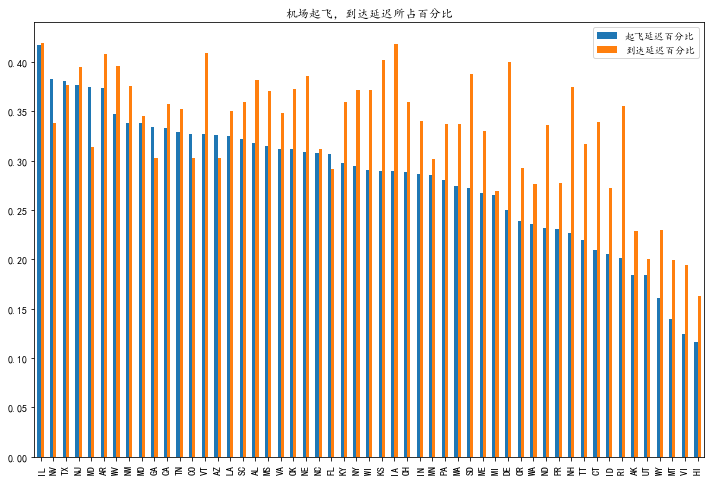

In [53]:
df.sort_values(by='起飞延迟百分比', ascending=False).plot(kind='bar', title='机场起飞，到达延迟所占百分比', figsize=(12, 8))